Imports

In [166]:
import numpy as np
import pandas as pd

from matplotlib import pyplot

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L1, L2, L1L2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Load Dataset

In [167]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Visualize Dataset

In [168]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


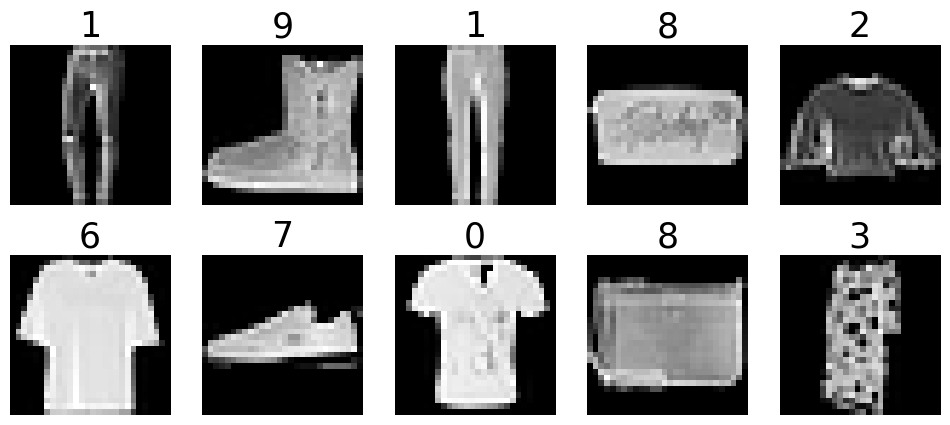

In [169]:
fig , axes  = pyplot.subplots(2, 5, figsize=(12,5))
axes   = axes.flatten()
idx = np.random.randint(0, 42000, size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i], :].reshape(28,28), cmap='gray')
    axes[i].axis('off') 
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)
pyplot.show()

Prepare Data

In [170]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [171]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [172]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [173]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_datagen = datagen.flow(X_train, y_train, batch_size = 32, shuffle=True)
test_datagen = datagen.flow(X_test, y_test, batch_size = 32, shuffle=False)

Prepare Model

In [174]:
model = Sequential()

model.add(Conv2D(128, (5, 5), 1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (5, 5), 1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (5, 5), 1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

criterion = Adam(learning_rate=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer=criterion, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train

In [175]:
history = model.fit(train_datagen, epochs=10, validation_data = test_datagen, callbacks=[early_stop])

Epoch 1/10
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:07 36ms/step - accuracy: 0.1736 - loss: 2.3257

c:\Users\ronan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.5949 - loss: 1.0706 - val_accuracy: 0.7541 - val_loss: 0.6441
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7690 - loss: 0.6089 - val_accuracy: 0.7862 - val_loss: 0.5642
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7978 - loss: 0.5327 - val_accuracy: 0.8093 - val_loss: 0.5140
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8157 - loss: 0.4895 - val_accuracy: 0.8239 - val_loss: 0.4666
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.8259 - loss: 0.4594 - val_accuracy: 0.8343 - val_loss: 0.4483
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.8332 - loss: 0.4417 - val_accuracy: 0.8310 - val_loss: 0.4473
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 50ms/step - accuracy: 0.8367 - loss: 0.4324 - val_accuracy: 0.8342 - val_loss: 0.4510
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.8428 - loss: 0.42

Validation

In [176]:
model.evaluate(test_datagen)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8521 - loss: 0.4077


[0.41763046383857727, 0.849399983882904]

In [177]:
y_pred = model.predict(X_test)

# Can do anything you want with this to validate/view

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


<Axes: >

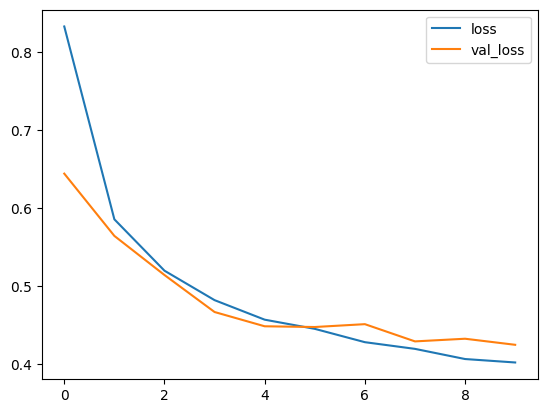

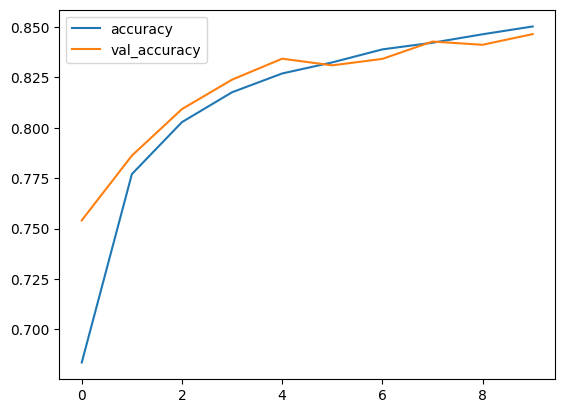

In [178]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()